# Determine insights about biohazards at different stations

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

biohaz = pd.read_excel('Biohazards at station count blanks.xlsx',na_values=[' ','?','_'])
# importing excel file and replacing null values with NaN/not a number
biohaz

,Case Number,Opened Date,Sub-Category,Station,Station2,Downtown,Counts
0,277777,2022-01-07,Biohazard in station,A20 - Fruitvale (Oakland),A20,0,9.0
1,279368,2022-02-18,Biohazard in station,A20 - Fruitvale (Oakland),A20,0,NaN
2,284760,2022-06-06,Biohazard in station,A20 - Fruitvale (Oakland),A20,0,NaN
3,285421,2022-06-15,Biohazard in station,A20 - Fruitvale (Oakland),A20,0,NaN
4,288690,2022-08-01,Biohazard in station,A20 - Fruitvale (Oakland),A20,0,NaN
...,...,...,...,...,...,...,...
174,282408,2022-04-22,Biohazard in station,W40 - Millbrae,W40,0,NaN
175,283554,2022-05-16,Biohazard in station,W40 - Millbrae,W40,0,NaN
176,286860,2022-07-06,Biohazard in station,W40 - Millbrae,W40,0,NaN
177,287317,2022-07-13,Biohazard in station,W40 - Millbrae,W40,0,NaN


# Changing column header name

In [3]:
biohaz.rename(columns={'Station2':'StationCode'},inplace=True)
biohaz

,Case Number,Opened Date,Sub-Category,Station,StationCode,Downtown,Counts
0,277777,2022-01-07,Biohazard in station,A20 - Fruitvale (Oakland),A20,0,9.0
1,279368,2022-02-18,Biohazard in station,A20 - Fruitvale (Oakland),A20,0,NaN
2,284760,2022-06-06,Biohazard in station,A20 - Fruitvale (Oakland),A20,0,NaN
3,285421,2022-06-15,Biohazard in station,A20 - Fruitvale (Oakland),A20,0,NaN
4,288690,2022-08-01,Biohazard in station,A20 - Fruitvale (Oakland),A20,0,NaN
...,...,...,...,...,...,...,...
174,282408,2022-04-22,Biohazard in station,W40 - Millbrae,W40,0,NaN
175,283554,2022-05-16,Biohazard in station,W40 - Millbrae,W40,0,NaN
176,286860,2022-07-06,Biohazard in station,W40 - Millbrae,W40,0,NaN
177,287317,2022-07-13,Biohazard in station,W40 - Millbrae,W40,0,NaN


# Grouping by stations, downtown location or not, and summing counts

In [4]:
biohaz_test=biohaz[['Downtown','StationCode','Counts']]
#biohaz_test
#Group station by downtown or not downtown location and summing by station code
biohaz_group= biohaz_test.groupby(['Downtown','StationCode'], as_index=False).sum()
biohaz_group

,Downtown,StationCode,Counts
0,0,A20,9.0
1,0,A30,3.0
2,0,A40,3.0
3,0,A50,2.0
4,0,A60,2.0
5,0,A80,2.0
6,0,C10,2.0
7,0,C30,1.0
8,0,C40,9.0
9,0,C50,2.0


# Pivoting columns in matrix table for better viewing

In [5]:
biohaz_pivot = biohaz_group.pivot(index= 'Downtown', columns='StationCode')
biohaz_pivot

Counts                                               ...        \
StationCode    A20  A30  A40  A50  A60  A80  C10  C30  C40  C50  ...   M70   
Downtown                                                         ...         
0              9.0  3.0  3.0  2.0  2.0  2.0  2.0  1.0  9.0  2.0  ...  10.0   
1              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   

                                                           
StationCode   M90  R10  R20  R30  R50  R60  W10  W30  W40  
Downtown                                                   
0            17.0  2.0  2.0  2.0  4.0  2.0  6.0  1.0  8.0  
1             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[2 rows x 37 columns]

# Correlation

(0.0, 23.05)

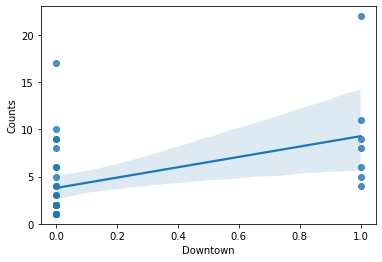

In [6]:
sns.regplot(x = 'Downtown', y = 'Counts', data=biohaz_test)
plt.ylim(0,)
# Correlation coefficient = 0 and extremely high P-value indicates no correlation between downtown stations
# and biohazard counts

# Bar chart for distribution by station

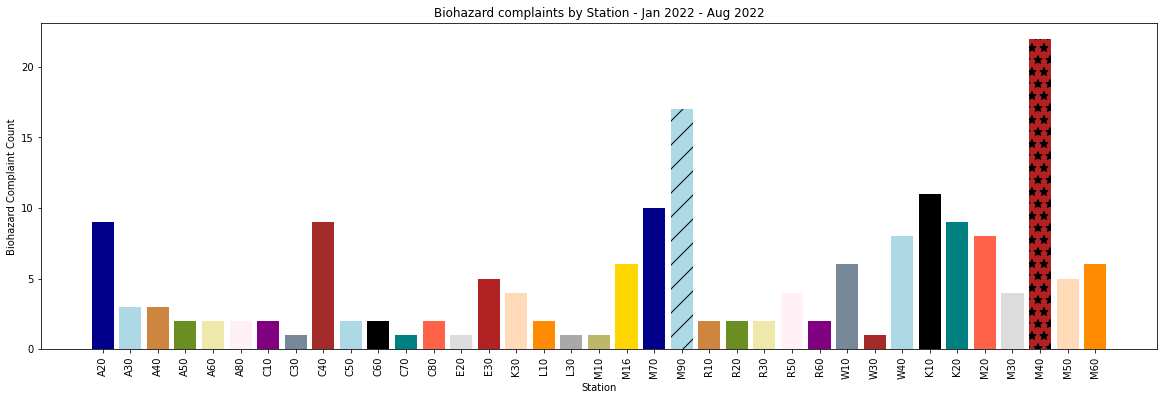

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import random

all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=20)
plt.figure(figsize = (20,6))
plt.bar(biohaz_group['StationCode'],biohaz_group['Counts'], color=c,width=.8)
bio_counts = plt.bar(biohaz_group['StationCode'],biohaz_group['Counts'], color=c,width=.8)
bio_counts[34].set_hatch('*')
bio_counts[21].set_hatch('/')
plt.xticks(rotation=90)
plt.title('Biohazard complaints by Station - Jan 2022 - Aug 2022')
plt.xlabel('Station')
plt.ylabel('Biohazard Complaint Count')
plt.show()

# The bar chart above indicates that more resources should be prioritized for the M90 and M40 stations.

# Chart showing downtown stations vs others in biohazard counts

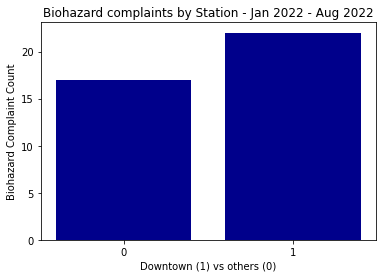

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import math

all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=1)
plt.figure(figsize = (6,4))
plt.bar(biohaz_group['Downtown'],biohaz_group['Counts'], color=c,width=.1)
bio_counts = plt.bar(biohaz_group['Downtown'],biohaz_group['Counts'], color=c,width=.8)
plt.xticks([0,1])
plt.title('Biohazard complaints by Station - Jan 2022 - Aug 2022')
plt.xlabel('Downtown (1) vs others (0)')
plt.ylabel('Biohazard Complaint Count')
plt.show()

# Can not conclude that biohazard complaints are primarily at downtown stations.